<a href="https://colab.research.google.com/github/alamjane/AI-Agriculture-deployment/blob/master/multiple_regression_YouTube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving hiring.csv to hiring (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hiring.csv']))

In [ ]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [ ]:
df.experience = df.experience.fillna('zero')

df.experience

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [ ]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [ ]:
!pip install word2number

from  word2number import w2n

df.experience = df.experience.apply(w2n.word_to_num)

In [ ]:
df.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
import math
median = math.floor(df['test_score(out of 10)'].median())

median

8

In [ ]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median)

In [ ]:
df.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


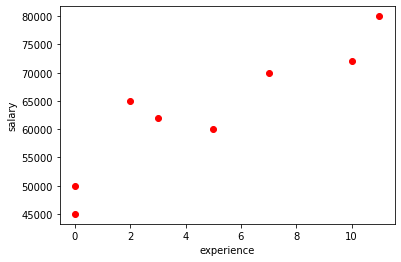

In [ ]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

plt.xlabel('experience')
plt.ylabel('salary')
plt.scatter(df.experience, df.salary, color='red', marker = 'o')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']],df.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [ ]:
reg.intercept_

17737.263464337702

In [ ]:
reg.predict([[5,6,7]])

array([58312.95487627])

In [ ]:
reg.predict([[10,10,10]])

array([86376.27365357])

In [ ]:
 2812.95487627*10 + 1845.70596798 *10 + 2205.24017467 *10 + 17737.263464337702

86376.2736535377

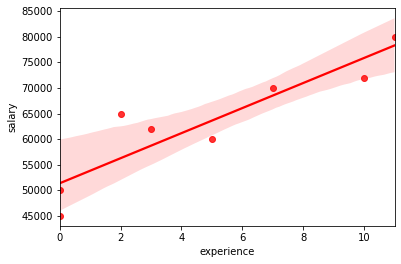

In [ ]:
import seaborn as sns
sns.regplot(x='experience',y='salary',data=df, color = 'red')